Index(['hmid', 'wid', 'reflection_period', 'original_hm', 'cleaned_hm',
       'modified', 'num_sentence', 'ground_truth_category',
       'predicted_category'],
      dtype='object')


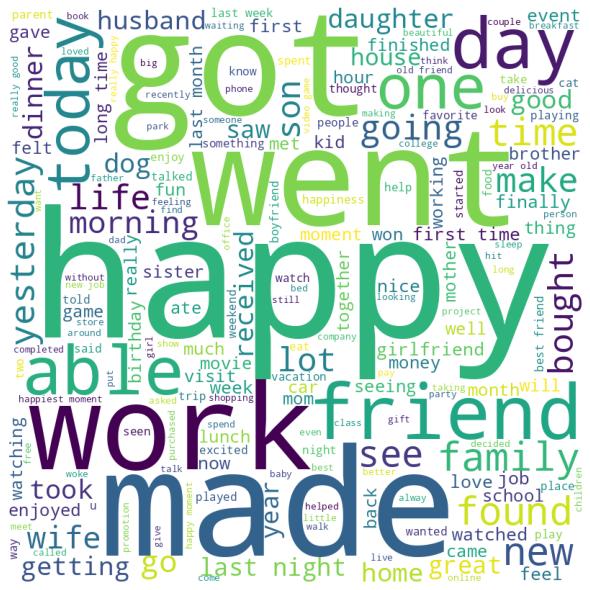

In [1]:
from wordcloud import WordCloud 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/wordCloud/cleaned_hm.csv') 
print(df.columns) # Printing the column names to verify the data


# Concatenate all text items into a single string. 
text = ' '.join(df['cleaned_hm'].dropna())

#Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None,  # You can add a set of words to ignore here
                min_font_size = 10).generate(text)

#Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 

#Save the word cloud
plt.savefig('images/general/wordcloud.png')
plt.show()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
import warnings

happy_2023 = pd.read_csv("data/WHR/WHR2023.csv")
country_mapping = pd.read_csv("data/continents/continents.csv")

# Dropping irrelevant columns
country_mapping.drop('alpha-2', inplace=True, axis=1)

# Remove all columns between column name 'country-code' to 'iso_3166-2' 
country_mapping = country_mapping.drop(country_mapping.loc[:, 'country-code':'iso_3166-2'].columns, axis=1)

# Remove all columns between column name 'intermediate-region' to 'intermediate-region-code' 
country_mapping = country_mapping.drop(country_mapping.loc[:, 'intermediate-region':'intermediate-region-code'].columns, axis=1)
country_mapping.head()

#Rename the columns for consistency
country_mapping = country_mapping.rename({'name':'country','alpha-3':'iso_alpha','sub-region':'sub_region'}, axis =1)


happy_2023.loc[happy_2023.duplicated()]

# Remove all columns between column name 'Ladder score in Dystopia' to 'Dystopia + residual' 
happy_2023 = happy_2023.drop(happy_2023.loc[:, 'Ladder score in Dystopia':'Dystopia + residual'].columns, axis=1)

# Remove all columns between column name 'Standard error of ladder score' to 'lowerwhisker' 
happy_2023 = happy_2023.drop(happy_2023.loc[:, 'Standard error of ladder score':'lowerwhisker'].columns, axis=1)

happy_2023['rank'] = happy_2023['Ladder score'].rank(ascending=False)
happy_2023['rank'] = happy_2023['rank'].astype(int)


happy_df_2023 = happy_2023.rename({'Country name':'country','Standard error of ladder score':'standard_error_of_ladder_score'
                                   , 'Ladder score':'happiness_score','Happiness score':'happiness_score'
                                   , 'Logged GDP per capita':'gdp_per_capita','Social support':'social_support'
                                   , 'Healthy life expectancy':'healthy_life_expectancy'
                                   , 'Freedom to make life choices':'freedom_to_make_life_choices'
                                   , 'Generosity':'generosity','Perceptions of corruption':'perceptions_of_corruption'
                                   , 'Explained by: Freedom to make life choices':'freedom_to_make_life_choices'
                                   , 'Explained by: Generosity':'generosity'
                                   , 'Explained by: Perceptions of corruption':'perceptions_of_corruption'}, axis =1)
happy_df_2023.head()


#Lets change the names in the country_mapping df to match those of the happiness report where appropriate

#Turkey ----> Turkiye
country_mapping['country'] = country_mapping['country'].str.replace('Turkey', 'Turkiye', regex=True)
#Palestine, State of ----> State of Palestine
country_mapping['country'] = country_mapping['country'].str.replace('Palestine, State of', 'State of Palestine', regex=True)
#Côte D'Ivoire ----> Ivory Coast
country_mapping['country'] = country_mapping['country'].str.replace("Côte D'Ivoire", 'Ivory Coast', regex=True)
#Macedonia ----> North Macedonia
country_mapping['country'] = country_mapping['country'].str.replace('Macedonia', 'North Macedonia', regex=True)
#Hong Kong ----> Hong Kong S.A.R. of China
country_mapping['country'] = country_mapping['country'].str.replace('Hong Kong', 'Hong Kong S.A.R. of China', regex=True)
#Taiwan ----> Taiwan Province of China
country_mapping['country'] = country_mapping['country'].str.replace('Taiwan', 'Taiwan Province of China', regex=True)
#Czech Republic ----> Czechia
country_mapping['country'] = country_mapping['country'].str.replace('Czech Republic', 'Czechia', regex=True)


#Merge the dataframes again
happy_region_df = happy_df_2023.merge(country_mapping, on='country', how='left')


#Lets fix the nulls in the last four rows manually
nan_region_rows = happy_region_df[happy_region_df['region'].isnull()]
nan_region_rows


#Manually updating region, sub_region and iso code for Kosovo
happy_region_df.loc[33,'region'] = 'Europe'
happy_region_df.loc[33,'sub_region'] = 'Southern Europe'
happy_region_df.loc[33,'iso_alpha'] = 'XXK'

#Manually updating region, sub_region and iso code for Bosnia and Herzegovina
happy_region_df.loc[70,'region'] = 'Europe'
happy_region_df.loc[70,'sub_region'] = 'Southern Europe'
happy_region_df.loc[70,'iso_alpha'] = 'BIH'

#Manually updating region, sub_region and iso code for Congo (Brazzaville)
happy_region_df.loc[85,'region'] = 'Africa'
happy_region_df.loc[85,'sub_region'] = 'Sub-Saharan Africa'
happy_region_df.loc[85,'iso_alpha'] = 'COG'

#Manually updating region, sub_region and iso code for Congo (Kinshasa)
happy_region_df.loc[132,'region'] = 'Africa'
happy_region_df.loc[132,'sub_region'] = 'Sub-Saharan Africa'
happy_region_df.loc[132,'iso_alpha'] = 'COD'


import plotly.express as px

# Assuming happy_region_df and other necessary variables are already defined

fig = px.sunburst(data_frame=happy_region_df,
                  path=["region", "sub_region", "country"],
                  values="happiness_score",
                  color="happiness_score",
                  color_continuous_scale='Viridis',
                  width=1000, 
                  height=1000,
                  title='Happiness score sunburst - region / sub region / country')

# Here's how you update the legend title
fig.update_layout(coloraxis_colorbar_title='Happiness Score')

fig.write_image(file='images/general/Sunburst.png', format='png')
fig.show()

In [3]:
import pandas as pd
import plotly.express as px

#reads happienss report csv
happiness = pd.read_csv('data/WHR/cleanData/clean2023HappinessData.csv')

'''
Happiness score or subjective well-being (variable name ladder): The survey
measure of SWB is from the Jan 20, 2023 release of the Gallup World Poll
(GWP) covering years from 2005 to 2022. Unless stated otherwise, it is the national average 
response to the question of life evaluations. The English wording of the question is 
“Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top.
The top of the ladder represents the best possible life for you and the bottom 
of the ladder represents the worst possible life for you. On which step of 
the ladder would you say you personally feel you stand at this time?” This 
measure is also referred to as Cantril life ladder, or just life ladder in our analysis.
'''
#saves only the necessary columns
avg = happiness[['Country name', 'Life Ladder', 'Country Code']]

# takes the mean of life ladder score for all years and saves it with corresponding country code and name
avg = avg.groupby('Country name').agg({'Country Code': 'first', 'Life Ladder': 'mean'}).reset_index()
avg['year'] = 'AVG' # sets year AVG

result = pd.concat([happiness, avg], ignore_index=True) #adds avg dataframe to happiness dataframe as "final year"

# Creates basic choropleth map of Life Ladder Scores as Color
fig = px.choropleth(result, locations='Country Code', color='Life Ladder', hover_name='Country name', animation_frame='year',
                    projection='natural earth', title='Life Ladder Score', color_continuous_scale='Viridis')

# Increases speed of animation
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 150
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 25

fig.show() # displays figure




<Figure size 432x288 with 0 Axes>

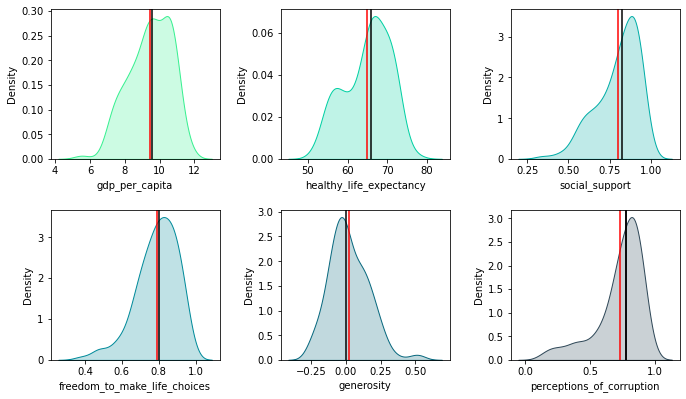

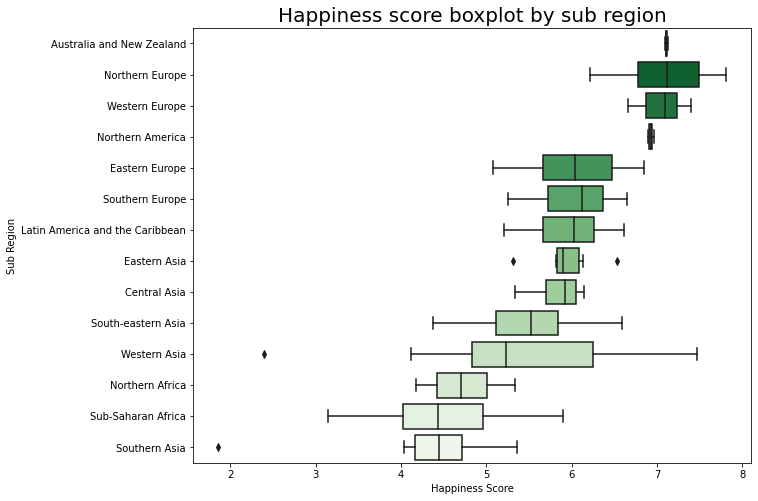

<Figure size 360x720 with 0 Axes>

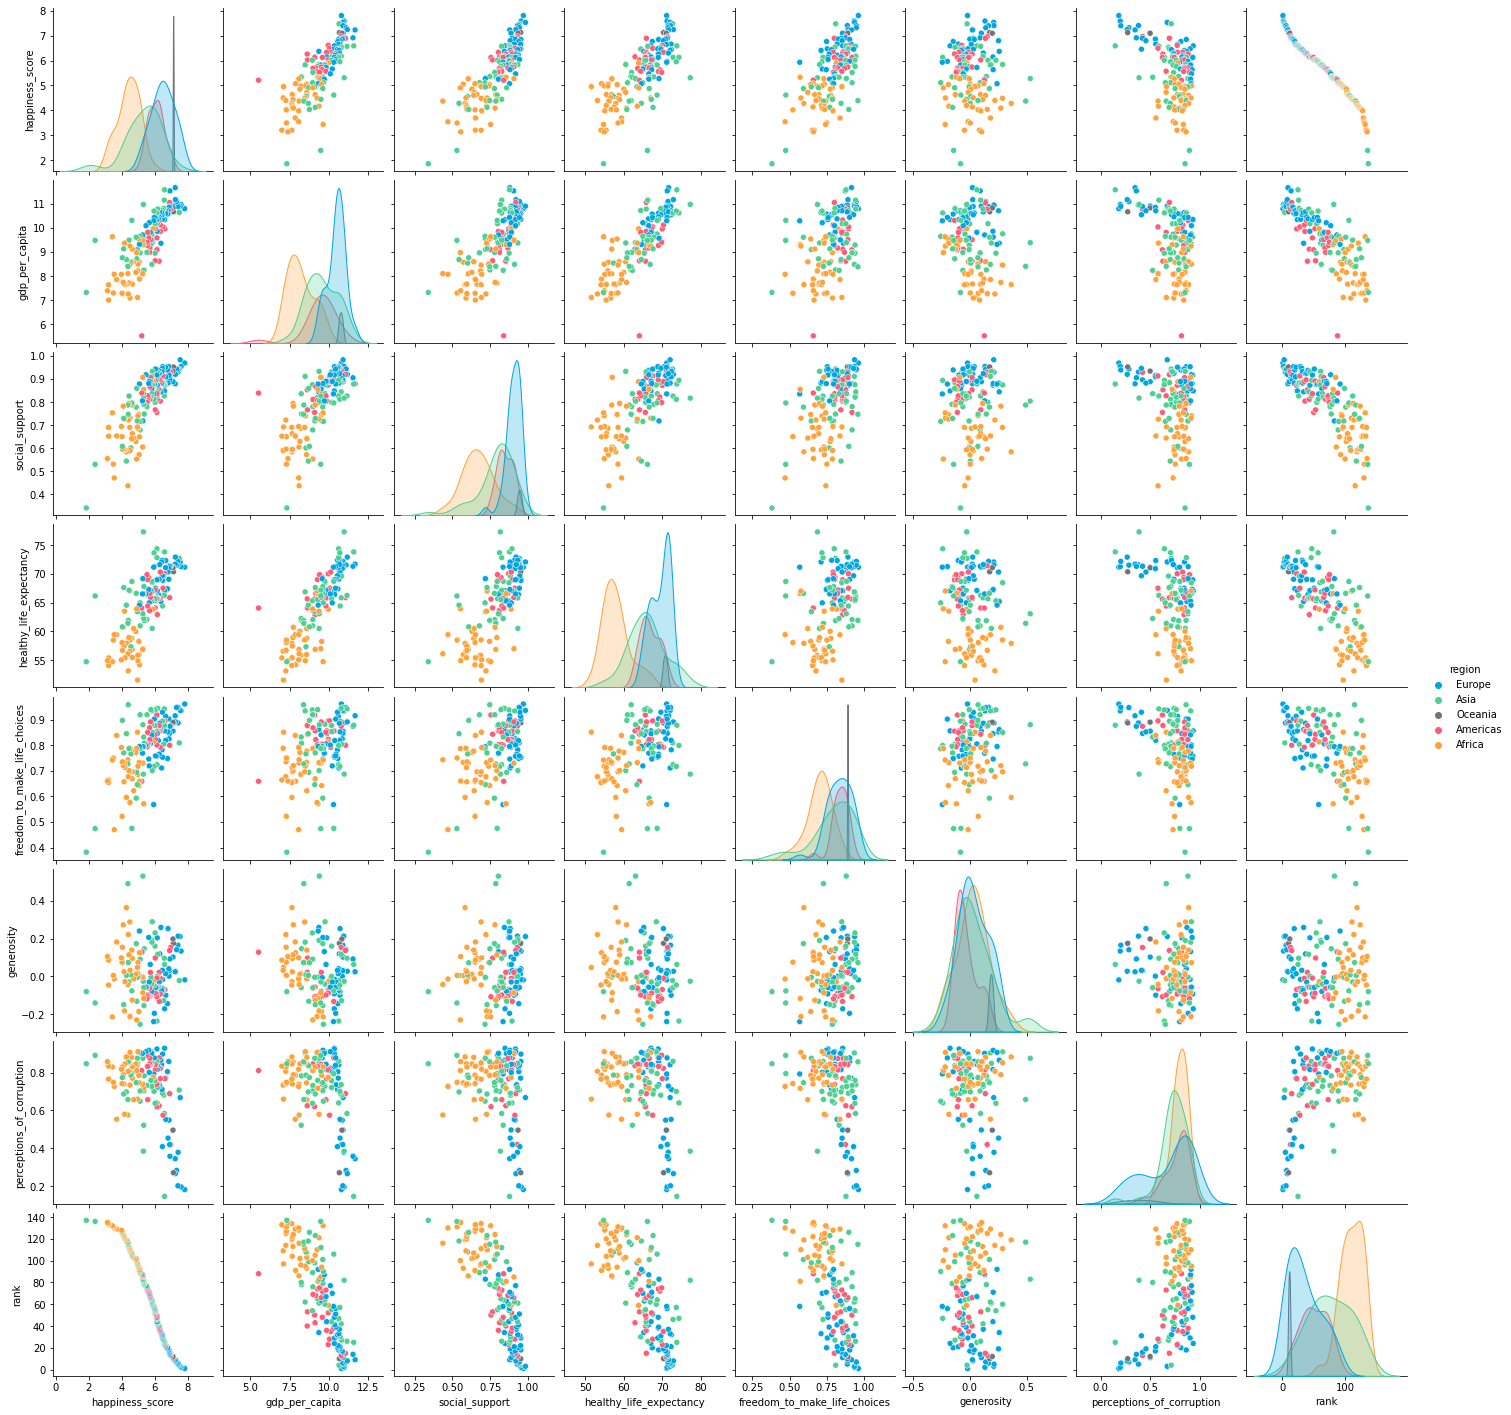

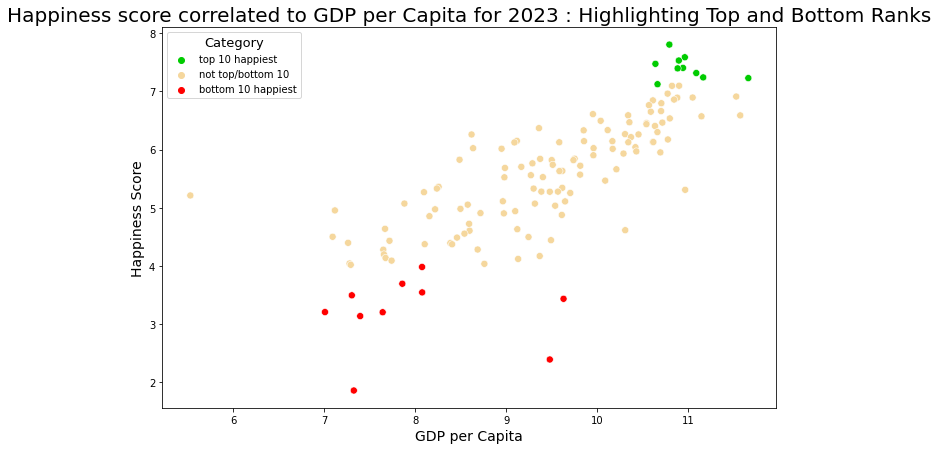

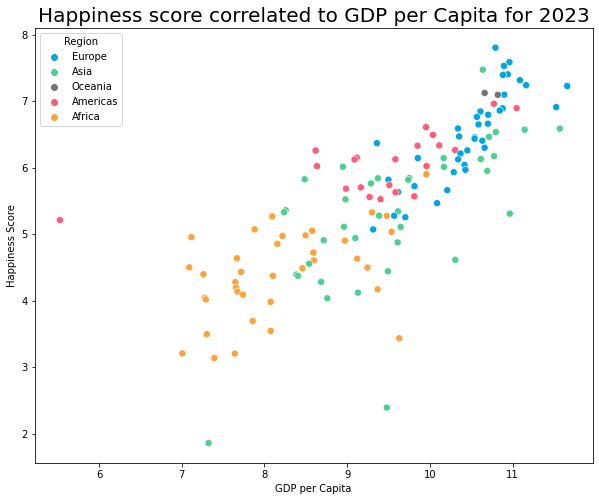

<AxesSubplot:xlabel='social_support', ylabel='healthy_life_expectancy'>

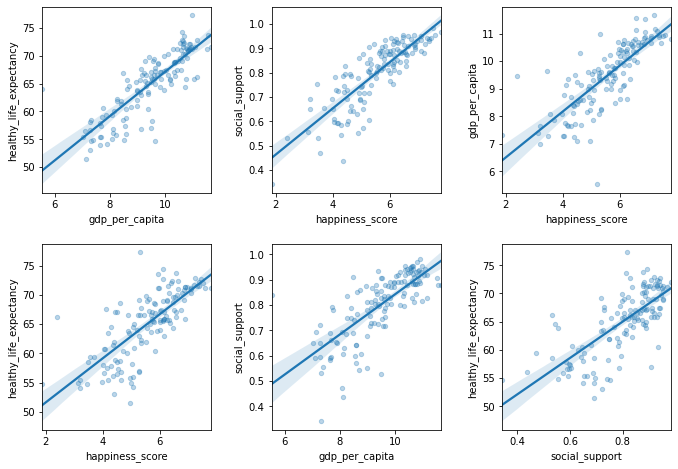

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
import warnings

happy_2023 = pd.read_csv("WHR2023.csv")
country_mapping = pd.read_csv("continents.csv")

# Dropping irrelevant columns
country_mapping.drop('alpha-2', inplace=True, axis=1)

# Remove all columns between column name 'country-code' to 'iso_3166-2' 
country_mapping = country_mapping.drop(country_mapping.loc[:, 'country-code':'iso_3166-2'].columns, axis=1)

# Remove all columns between column name 'intermediate-region' to 'intermediate-region-code' 
country_mapping = country_mapping.drop(country_mapping.loc[:, 'intermediate-region':'intermediate-region-code'].columns, axis=1)
country_mapping.head()

#Rename the columns for consistency
country_mapping = country_mapping.rename({'name':'country','alpha-3':'iso_alpha','sub-region':'sub_region'}, axis =1)

happy_2023.loc[happy_2023.duplicated()]

# Remove all columns between column name 'Ladder score in Dystopia' to 'Dystopia + residual' 
happy_2023 = happy_2023.drop(happy_2023.loc[:, 'Ladder score in Dystopia':'Dystopia + residual'].columns, axis=1)

# Remove all columns between column name 'Standard error of ladder score' to 'lowerwhisker' 
happy_2023 = happy_2023.drop(happy_2023.loc[:, 'Standard error of ladder score':'lowerwhisker'].columns, axis=1)

happy_2023['rank'] = happy_2023['Ladder score'].rank(ascending=False)
happy_2023['rank'] = happy_2023['rank'].astype(int)

happy_df_2023 = happy_2023.rename({'Country name':'country','Standard error of ladder score':'standard_error_of_ladder_score'
                                   , 'Ladder score':'happiness_score','Happiness score':'happiness_score'
                                   , 'Logged GDP per capita':'gdp_per_capita','Social support':'social_support'
                                   , 'Healthy life expectancy':'healthy_life_expectancy'
                                   , 'Freedom to make life choices':'freedom_to_make_life_choices'
                                   , 'Generosity':'generosity','Perceptions of corruption':'perceptions_of_corruption'
                                   , 'Explained by: Freedom to make life choices':'freedom_to_make_life_choices'
                                   , 'Explained by: Generosity':'generosity'
                                   , 'Explained by: Perceptions of corruption':'perceptions_of_corruption'}, axis =1)
happy_df_2023.head()


#Create top 10 and bottom 10 identifier column

def top_bottom_identifier(value):
    if value < 11:
        return "top 10 happiest"
    if value > 127:
        return "bottom 10 happiest"
    elif 11 <= value < 128:
        return "not top/bottom 10"
    
 
happy_df_2023['top_bottom_identifier'] = happy_df_2023['rank'].map(top_bottom_identifier)


#Lets change the names in the country_mapping df to match those of the happiness report where appropriate

#Turkey ----> Turkiye
country_mapping['country'] = country_mapping['country'].str.replace('Turkey', 'Turkiye', regex=True)
#Palestine, State of ----> State of Palestine
country_mapping['country'] = country_mapping['country'].str.replace('Palestine, State of', 'State of Palestine', regex=True)
#Côte D'Ivoire ----> Ivory Coast
country_mapping['country'] = country_mapping['country'].str.replace("Côte D'Ivoire", 'Ivory Coast', regex=True)
#Macedonia ----> North Macedonia
country_mapping['country'] = country_mapping['country'].str.replace('Macedonia', 'North Macedonia', regex=True)
#Hong Kong ----> Hong Kong S.A.R. of China
country_mapping['country'] = country_mapping['country'].str.replace('Hong Kong', 'Hong Kong S.A.R. of China', regex=True)
#Taiwan ----> Taiwan Province of China
country_mapping['country'] = country_mapping['country'].str.replace('Taiwan', 'Taiwan Province of China', regex=True)
#Czech Republic ----> Czechia
country_mapping['country'] = country_mapping['country'].str.replace('Czech Republic', 'Czechia', regex=True)


#Merge the dataframes again
happy_region_df = happy_df_2023.merge(country_mapping, on='country', how='left')

#Lets fix the nulls in the last four rows manually
nan_region_rows = happy_region_df[happy_region_df['region'].isnull()]
nan_region_rows

#Manually updating region, sub_region and iso code for Kosovo
happy_region_df.loc[33,'region'] = 'Europe'
happy_region_df.loc[33,'sub_region'] = 'Southern Europe'
happy_region_df.loc[33,'iso_alpha'] = 'XXK'

#Manually updating region, sub_region and iso code for Bosnia and Herzegovina
happy_region_df.loc[70,'region'] = 'Europe'
happy_region_df.loc[70,'sub_region'] = 'Southern Europe'
happy_region_df.loc[70,'iso_alpha'] = 'BIH'

#Manually updating region, sub_region and iso code for Congo (Brazzaville)
happy_region_df.loc[85,'region'] = 'Africa'
happy_region_df.loc[85,'sub_region'] = 'Sub-Saharan Africa'
happy_region_df.loc[85,'iso_alpha'] = 'COG'

#Manually updating region, sub_region and iso code for Congo (Kinshasa)
happy_region_df.loc[132,'region'] = 'Africa'
happy_region_df.loc[132,'sub_region'] = 'Sub-Saharan Africa'
happy_region_df.loc[132,'iso_alpha'] = 'COD'

fig = plt. figure()
fig, axes = plt.subplots(2, 3, figsize= (10, 6))
plt.tight_layout(pad= 3)


plta = sns.kdeplot( data=happy_region_df, x='gdp_per_capita',color='#37F090',fill=True, ax=axes[0,0])
pltb = sns.kdeplot( data=happy_region_df, x='healthy_life_expectancy',color='#00D0A3',fill=True, ax=axes[0,1])
pltc = sns.kdeplot( data=happy_region_df, x='social_support',color='#00ADA7',fill=True, ax=axes[0,2])
pltd = sns.kdeplot( data=happy_region_df, x='freedom_to_make_life_choices',color='#008A9A',fill=True, ax=axes[1,0])
plte = sns.kdeplot( data=happy_region_df, x='generosity',color='#08687E',fill=True, ax=axes[1,1])
pltf = sns.kdeplot( data=happy_region_df, x='perceptions_of_corruption',color='#2F4858',fill=True, ax=axes[1,2])


plta.axvline(x = happy_region_df['gdp_per_capita'].mean(), color = 'red')
plta.axvline(x = happy_region_df['gdp_per_capita'].median(), color = 'black')
pltb.axvline(x = happy_region_df['healthy_life_expectancy'].mean(), color = 'red')
pltb.axvline(x = happy_region_df['healthy_life_expectancy'].median(), color = 'black')
pltc.axvline(x = happy_region_df['social_support'].mean(), color = 'red')
pltc.axvline(x = happy_region_df['social_support'].median(), color = 'black')
pltd.axvline(x = happy_region_df['freedom_to_make_life_choices'].mean(), color = 'red')
pltd.axvline(x = happy_region_df['freedom_to_make_life_choices'].median(), color = 'black')
plte.axvline(x = happy_region_df['generosity'].mean(), color = 'red')
plte.axvline(x = happy_region_df['generosity'].median(), color = 'black')
pltf.axvline(x = happy_region_df['perceptions_of_corruption'].mean(), color = 'red')
pltf.axvline(x = happy_region_df['perceptions_of_corruption'].median(), color = 'black')
pltf.axvline(x = happy_region_df['perceptions_of_corruption'].median(), color = 'black')

#Visualise GDP per capita on a global scale

gdp_world_map = px.choropleth(happy_region_df, locations = "iso_alpha", 
              color = "gdp_per_capita", scope = 'world', title = "GDP Ranking World Map", 
              color_continuous_scale= "rdylgn", hover_name="country")

gdp_world_map.show()

mean_happiness = happy_region_df.groupby('sub_region')[['happiness_score']].mean()
mean_happiness = mean_happiness.sort_values(by=['happiness_score'], ascending=False)
mean_happiness


#lets see what this looks like on a boxplot graph, ordering my sub_region mean

fig, ax = plt.subplots(figsize=(10,8))
plt.title("Happiness score boxplot by sub region", fontsize = 20)
sns.boxplot(y="sub_region", x="happiness_score", data=happy_region_df, orient="h", ax=ax, palette='Greens_r'
            , order=["Australia and New Zealand", "Northern Europe", "Western Europe", "Northern America", "Eastern Europe"
                     ,"Southern Europe","Latin America and the Caribbean","Eastern Asia","Central Asia","South-eastern Asia"
                     ,"Western Asia","Northern Africa","Sub-Saharan Africa","Southern Asia"]).set(
    xlabel='Happiness Score', 
    ylabel='Sub Region'
)

#Lets visualise this dataframe
palette ={"Europe": "#00A5E3", "Asia": "#4DD091", "Oceania": "#74737A", "Americas": "#FF5C77", "Africa": "#FFA23A"}
plt.figure(figsize = (5,10))
sns.pairplot(happy_region_df, hue = 'region', palette = palette)

fig, axes = plt.subplots(figsize=(11, 7))

# Define your custom palette
palette2 = {"top 10 happiest": "#00CC00", "bottom 10 happiest": "#FF0000", "not top/bottom 10": "#f5d79d"}

# Create the scatter plot
plot = sns.scatterplot(
    x=happy_region_df.gdp_per_capita,
    y=happy_region_df.happiness_score,
    ax=axes,
    hue=happy_region_df.top_bottom_identifier,
    palette=palette2,
    s=50,
    legend='full'  # Ensure legend is shown
)

# Set the labels and title
axes.set_xlabel("GDP per Capita", fontsize=14)
axes.set_ylabel("Happiness Score", fontsize=14)
axes.set_title("Happiness score correlated to GDP per Capita for 2023 : Highlighting Top and Bottom Ranks", fontsize=20)

# Handle the legend
# Extract the handles and labels from the current plot
handles, labels = axes.get_legend_handles_labels()
# Create a custom legend
axes.legend(handles=handles, labels=labels, title='Category', loc='best', fontsize='medium', title_fontsize='13')

# Show the plot
plt.show()


palette = {
    "Europe": "#00A5E3", 
    "Asia": "#4DD091", 
    "Oceania": "#74737A", 
    "Americas": "#FF5C77", 
    "Africa": "#FFA23A"
}

# Create a scatter plot
fig, axes = plt.subplots(figsize=(10,8))
sns.scatterplot(x='gdp_per_capita', y='happiness_score', data=happy_region_df,
                hue='region', palette=palette, s=50, ax=axes)

# Set the labels and title
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("Happiness score correlated to GDP per Capita for 2023", fontsize=20)

# Ensure the legend is displayed. This line may be adjusted or omitted if the legend displays correctly by default.
axes.legend(title='Region')

plt.savefig('GDP2023.png')
plt.show()

corr = round(happy_region_df['gdp_per_capita'].corr(happy_region_df['happiness_score']), 3)

# Creating the scatter plot with a trendline
fig = px.scatter(happy_region_df, x='gdp_per_capita', y='happiness_score', color='region',
                 trendline='ols', trendline_scope="overall", trendline_color_override="black",
                 template="plotly_white",
                 labels={"gdp_per_capita": "GDP per Capita", "happiness_score": "Happiness Score"}, # Correctly setting axis labels
                 title=f"Happiness score correlated to GDP per Capita for 2023<br>Correlation: {corr}") # Setting the title
fig.update_layout(legend_title_text='Continents')
fig.write_image('GDP2023.png')

fig.show()

corr = round(happy_region_df['gdp_per_capita'].corr(happy_region_df['happiness_score']), 3)

# Creating the scatter plot with a trendline
fig = px.scatter(happy_region_df, x='gdp_per_capita', y='happiness_score', color='top_bottom_identifier',
                 trendline='ols', trendline_scope="overall", trendline_color_override="black",
                 template="plotly_white",
                 labels={"gdp_per_capita": "GDP per Capita", "happiness_score": "Happiness Score"}, # Correctly setting axis labels
                 title=f"Happiness score correlated to GDP per Capita for 2023<br>Correlation: {corr}") # Setting the title
fig.update_layout(legend_title_text='Continents')
fig.write_image('GDPTB2023.png')

fig.show()

correlation_mattrix = happy_region_df.drop(columns=['country','top_bottom_identifier','iso_alpha','region','sub_region'])
correlation_df = correlation_mattrix.corr()

#Let's visualise some of the strongest correlations

fig, axes = plt.subplots(2, 3, figsize= (10, 7))
plt.tight_layout(pad= 3)

sns.regplot(x = happy_region_df.gdp_per_capita, y = happy_region_df.healthy_life_expectancy, marker=".", scatter_kws={"alpha":0.3,"s":75},ax=axes[0,0])
sns.regplot(x = happy_region_df.happiness_score, y = happy_region_df.social_support, marker=".", scatter_kws={"alpha":0.3,"s":75}, ax=axes[0,1])
sns.regplot(x = happy_region_df.happiness_score, y = happy_region_df.gdp_per_capita, marker=".", scatter_kws={"alpha":0.3,"s":75}, ax=axes[0,2])
sns.regplot(x = happy_region_df.happiness_score, y = happy_region_df.healthy_life_expectancy, marker=".", scatter_kws={"alpha":0.3,"s":75}, ax=axes[1,0])
sns.regplot(x = happy_region_df.gdp_per_capita, y = happy_region_df.social_support, marker=".", scatter_kws={"alpha":0.3,"s":75}, ax=axes[1,1])
sns.regplot(x = happy_region_df.social_support, y = happy_region_df.healthy_life_expectancy, marker=".", scatter_kws={"alpha":0.3,"s":75}, ax=axes[1,2])



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pivottablejs import pivot_ui

plt.figure(figsize=(25, 12))
# Load the dataset into a DataFrame
data =pd.read_csv("data/healthcare/_hap.csv",skipfooter=1, engine='python') 
print("Shape before removing null values:", data.shape)

# Remove rows with any null values
data = data.dropna()

# Display the shape of the DataFrame after removing null values
print("Shape after removing null values:", data.shape)

# Create a pivot table using the pivot_ui function
pivot_ui(data)





Shape before removing null values: (1517, 5)
Shape after removing null values: (1517, 5)


<Figure size 1800x864 with 0 Axes>

  Continent  Year  Healthcare Access  Happiness score Country name
0      Asia  2014           53.90752            4.758  Afghanistan
1      Asia  2015           52.11036            3.832  Afghanistan
2      Asia  2016           52.06367            3.783  Afghanistan
3      Asia  2017           48.35519            3.572  Afghanistan
4      Asia  2018           52.55684            3.131  Afghanistan


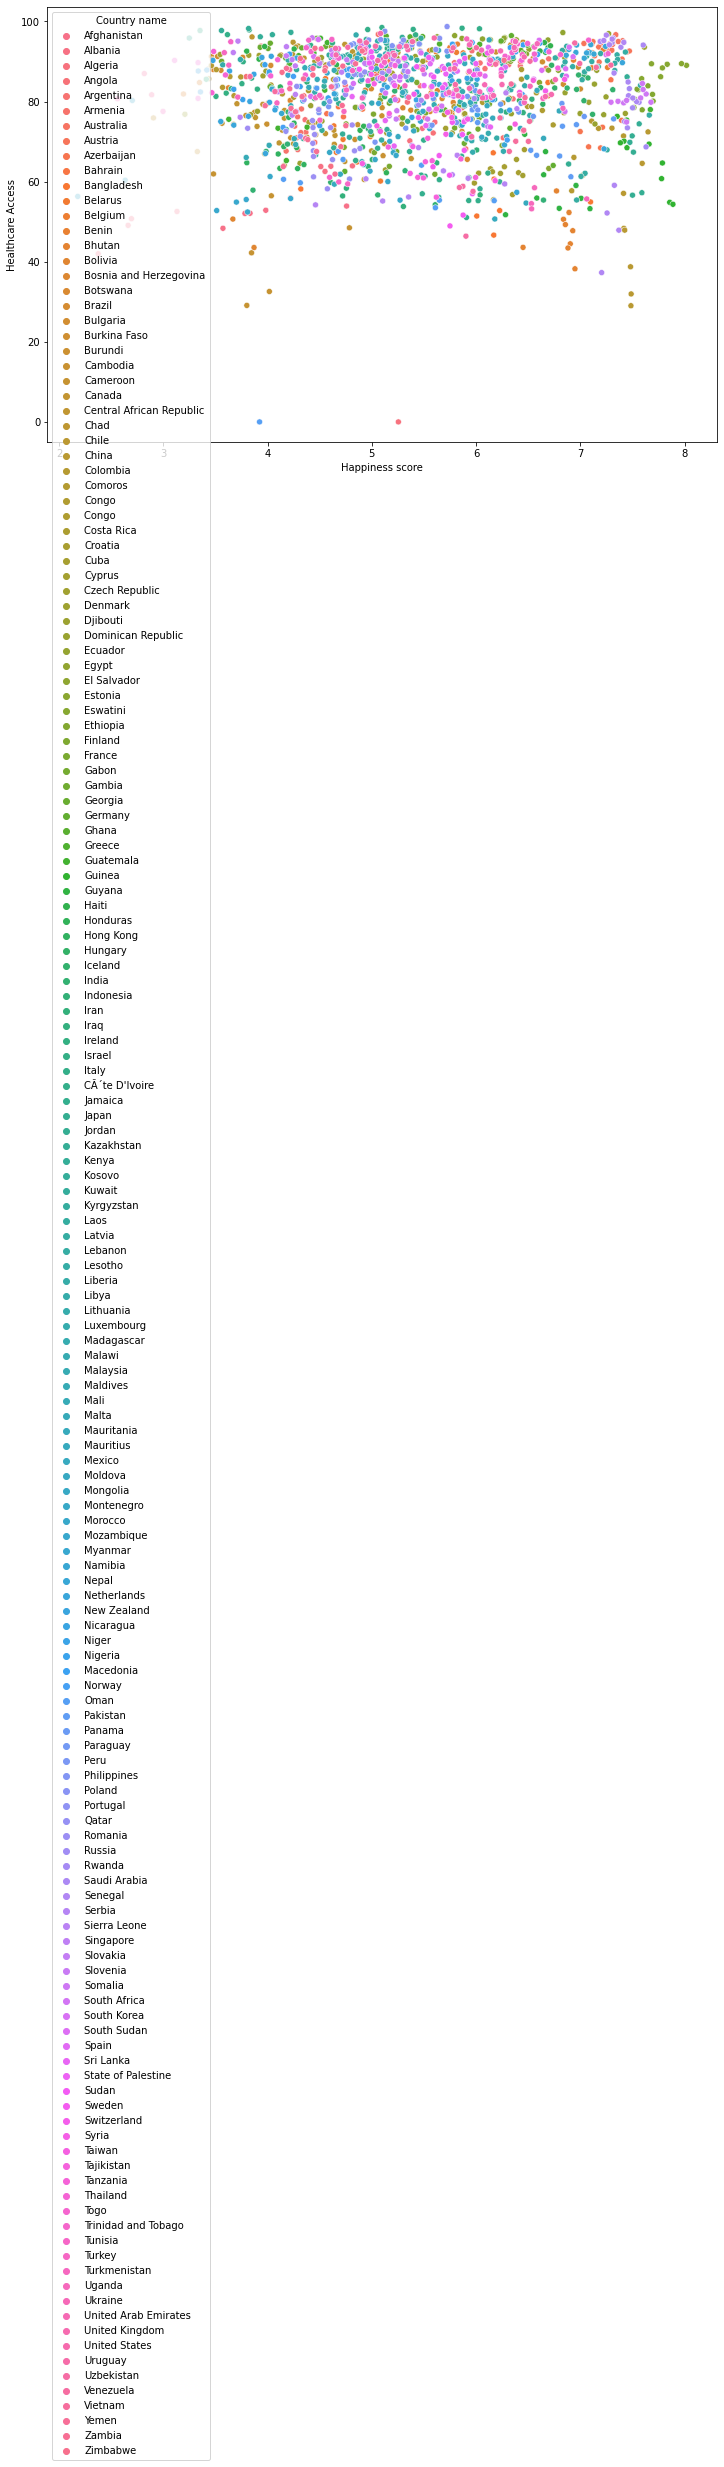

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/healthcare/_hap.csv')
print(df.head())

plt.figure(figsize=(12, 8))
sns.scatterplot(data = df, x = "Happiness score", y = "Healthcare Access", hue = 'Country name')
plt.show()

  Country name  year  Healthy life expectancy  Happiness score
0  Afghanistan  2012                51.099998            3.724
1  Afghanistan  2013                51.400002            4.402
2  Afghanistan  2014                51.700001            4.758
3  Afghanistan  2015                52.000000            3.832
4  Afghanistan  2016                52.299999            3.783


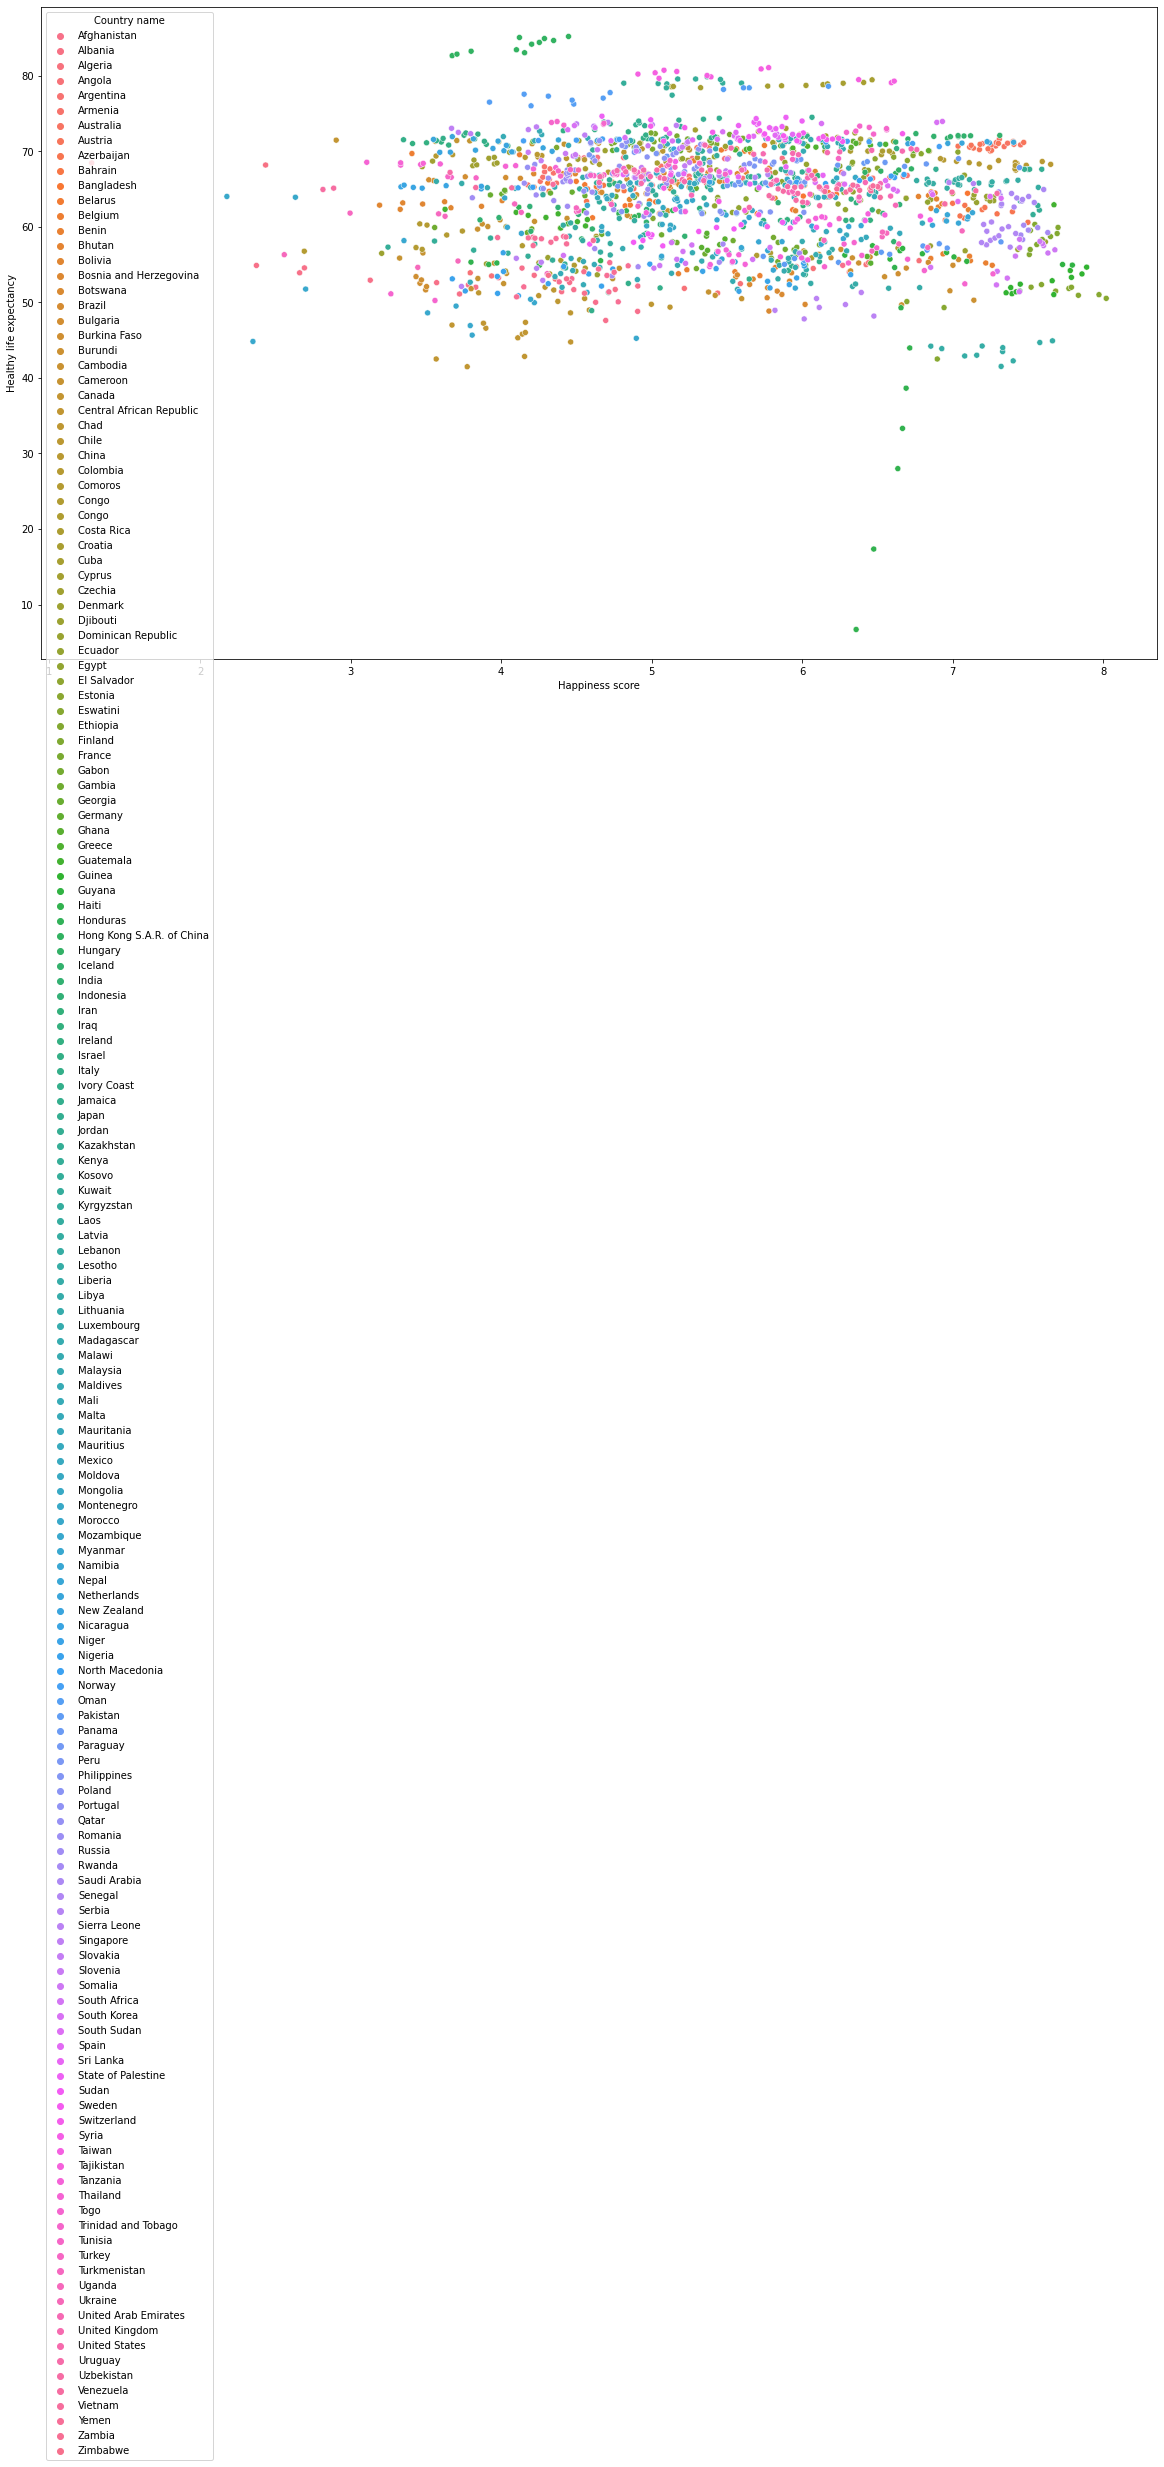

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("data/lifeExpectancy/Lifeexpectancyandhappinessscore.xlsx")
df.columns = df.columns.str.strip()
print(df.head())


plt.figure(figsize=(20, 12))
sns.scatterplot(data = df, x = "Happiness score", y = "Healthy life expectancy", hue = 'Country name')
plt.show()




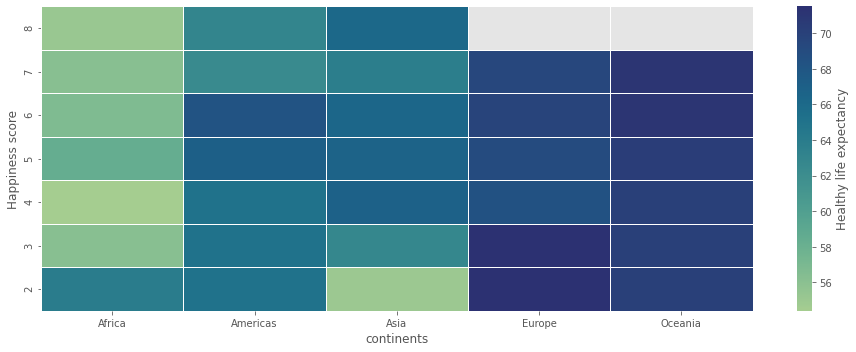

In [8]:
import pandas as pd   #importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.read_csv("data/lifeExpectancy/_life.csv")
#print(df)

# Select only the numeric columns
numeric_columns = df.select_dtypes(include='number')

# Round the numeric columns to integers
rounded_numeric_columns = numeric_columns.round().astype(int)

# Combine the rounded numeric columns with the non-numeric columns
rounded_df = pd.concat([df.drop(columns=numeric_columns.columns), rounded_numeric_columns], axis=1)

# Pivot the DataFrame for the heatmap
heatmap_data  = rounded_df.pivot_table(index='continents', columns='Happiness score', values='Healthy life expectancy')
heatmap_data_filled = heatmap_data.bfill(axis=1)
heatmap_data_filled = heatmap_data_filled.reindex(columns=heatmap_data.columns[::-1])

# Plotting the heatmap for Happiness Score
plt.figure(figsize=(25, 5))
plt.style.use('ggplot')
plt.subplot(1, 2, 1)
sns.heatmap(heatmap_data_filled.T,  annot=False,  fmt='.1f',cmap="crest", cbar_kws={'label': 'Healthy life expectancy'},linewidth=.5)
plt.tight_layout()
plt.show()

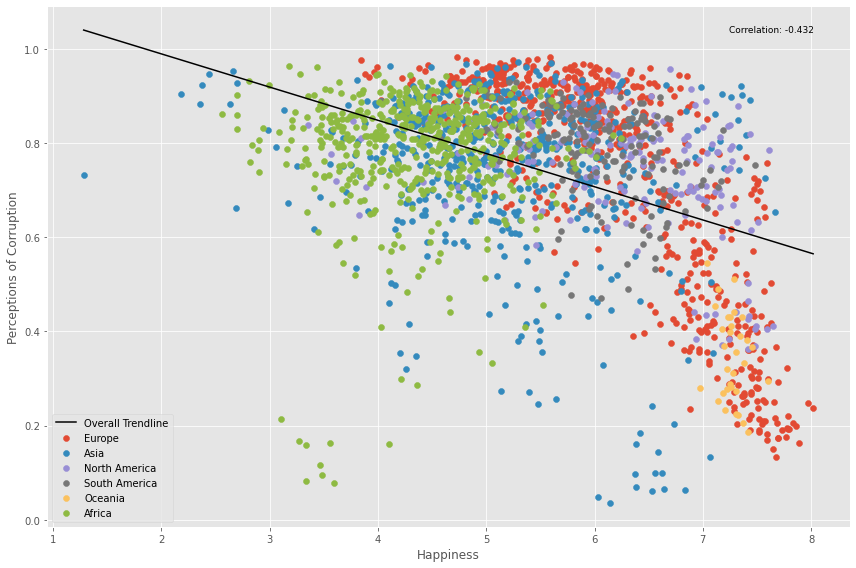

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Read the data
data = pd.read_csv('data/WHR/clean2023HappinessData.csv')
data_clean = data.dropna(subset=['Life Ladder', 'Perceptions of corruption'])




corr = round(data_clean['Perceptions of corruption'].corr(data_clean['Life Ladder']), 3)

# Fit the trend line on cleaned data
x = data_clean['Life Ladder']
y = data_clean['Perceptions of corruption']
m, b = np.polyfit(x, y, 1)

# Create x values for the trend line: from min to max of 'Life Ladder' in the cleaned data
x_trend = np.linspace(x.min(), x.max(), 100)
y_trend = m*x_trend + b



# Create the scatter plot
plt.figure(figsize=(12, 8))
for continent in data_clean['Continent'].unique():
    continent_data = data_clean[data_clean['Continent'] == continent]
    # Add the trend line and its label for the legend
    plt.scatter(continent_data['Life Ladder'], continent_data['Perceptions of corruption'], label=continent)

# Label axes, add title
plt.plot(x_trend, y_trend, color='black', linestyle='-', label='Overall Trendline')  # Dashed black trend line
plt.xlabel('Happiness')
plt.ylabel('Perceptions of Corruption')
plt.text(.85, .95, f'Correlation: {corr}', transform=plt.gca().transAxes, fontsize=9)
plt.legend()
plt.tight_layout()
plt.show()


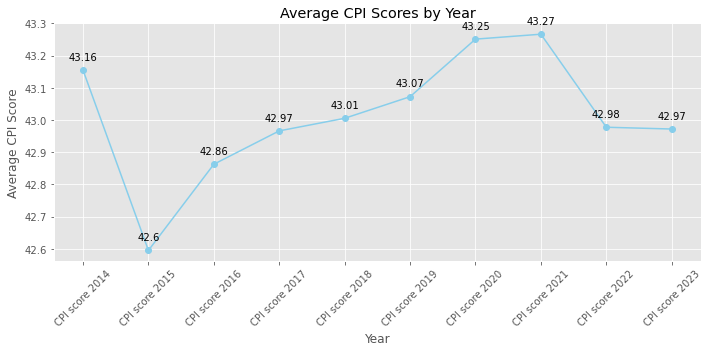

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a pandas DataFrame
file_path = 'data/corruption/CPI2021GlobalResults.csv'
cpi_data = pd.read_csv(file_path, skiprows=2)

# Extract the columns that contain the yearly CPI scores
cpi_score_columns = [col for col in cpi_data.columns if 'CPI score' in col]

# Calculate the average CPI score for each year
average_cpi_scores = cpi_data[cpi_score_columns].mean()
average_cpi_scores.sort_index(ascending=True, inplace=True)


# Create a line chart to display the average CPI scores
plt.figure(figsize=(10, 5))
plt.plot(average_cpi_scores.index.to_numpy(), average_cpi_scores.values, marker='o', color='skyblue', linestyle='-')

# Annotate each point with the value of the average
for i, txt in enumerate(average_cpi_scores.values):
    plt.annotate(round(txt, 2), (average_cpi_scores.index[i], txt), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Average CPI Scores by Year')
plt.xlabel('Year')
plt.ylabel('Average CPI Score')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


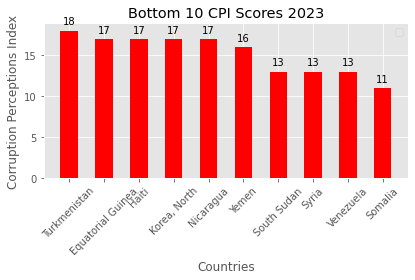

In [11]:
import matplotlib.pyplot as plt 
import csv 

x = [] 
y = []
data = []

  
with open('data/corruption/cpidata2023.csv','r') as csvfile: 
    plots = csv.reader(csvfile, delimiter = ',')
    next(plots, None) 
      
    for row in plots:
        country_name = row[0] 
        cpi_score = int(row[3])
        data.append((country_name, cpi_score))
  
bottom_10_countries = data[-10:]

# Unpack the top 10 countries into two lists for plotting
x, y = zip(*bottom_10_countries)

plt.bar(x, y, color='r', width=0.5)

for i in range(len(x)):
    plt.text(i, y[i] + 0.5, str(y[i]), ha='center', va='bottom')

# Plot the bottom 10 countries
plt.xlabel('Countries')
plt.ylabel('Corruption Perceptions Index')
plt.title('Bottom 10 CPI Scores 2023')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
import pycountry
from country_converter import CountryConverter
    
def get_alpha3(country_name):
    '''
    returns the ISO alpha 3 code for given country name
    '''
    try:
        country = pycountry.countries.get(name=country_name)
        return country.alpha_3
    except AttributeError:
        return None


# Happiness Report Data 2023
file_path = 'data/WHR/DataForTable2.1WHR2023.xls'

happiness = pd.read_excel(file_path)

happiness['Country Code'] = happiness['Country name'].apply(get_alpha3) #assigns country code to each country
happiness = happiness.sort_values('year', ascending=True) #sorts df by year in ascending order


#These countries don't exactly match the country name in pycountry dataset so need to be manually assigned
countries = ['Iran', 'Turkiye', 'Venezuela', 'Vietnam', 'Moldova', 'State of Palestine',
 'Russia', 'South Korea', 'Bolivia', 'Hong Kong S.A.R. of China', 'Laos',
 'Tanzania', 'Taiwan Province of China', 'Kosovo', 'Congo (Brazzaville)',
 'Syria', 'Congo (Kinshasa)', 'Somaliland region', 'Ivory Coast']
codes = ['IRN', 'TUR', 'VEN', 'VNM', 'MDA', 'PSE', 
         'RUS', 'KOR', 'BOL', 'HKG', 'LAO', 
         'TZA', 'TWN', 'XKK', 'COG', 
         'SYR', 'COD', 'SOM', 'CIV']
for country, code in zip(countries, codes):
    #assigns country its corresponding country code
    happiness.loc[happiness['Country name'] == country, 'Country Code'] = code

cc = CountryConverter()

# add continents of each country using country code with country converter library
happiness['Continent'] = happiness['Country Code'].apply(lambda x: cc.convert(names=x, to='continent_7', not_found=None))
happiness.loc[happiness['Country name'] == 'Kosovo', 'Continent'] = 'Europe'

# add regions of each country using country code with country converter library
happiness['Region'] = happiness['Country Code'].apply(lambda x: cc.convert(names=x, to='IMAGE', not_found=None))
happiness.loc[happiness['Country name'] == 'State of Palestine', 'Region'] = 'Middle East'
happiness.loc[happiness['Country name'] == 'Cuba', 'Region'] = 'Central America'
happiness.loc[happiness['Country name'] == 'South Sudan', 'Region'] = 'Eastern Africa'
happiness.loc[happiness['Country name'] == 'Kosovo', 'Region'] = 'Central Europe'

# saves cleaned up dataframe as a csv
happiness.to_csv('data/WHR/cleanData/clean2023HappinessData.csv', index=False)

XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3
XKK not found in ISO3


/home/tchanda/.local/lib/python3.9/site-packages/pycountry/db.py:51: UserWarning:

Country's official_name not found. Country name provided instead.

/home/tchanda/.local/lib/python3.9/site-packages/pycountry/db.py:51: UserWarning:

Country's common_name not found. Country name provided instead.



Error getting continent for State of Palestine: "Invalid Country Name: 'State of Palestine'"


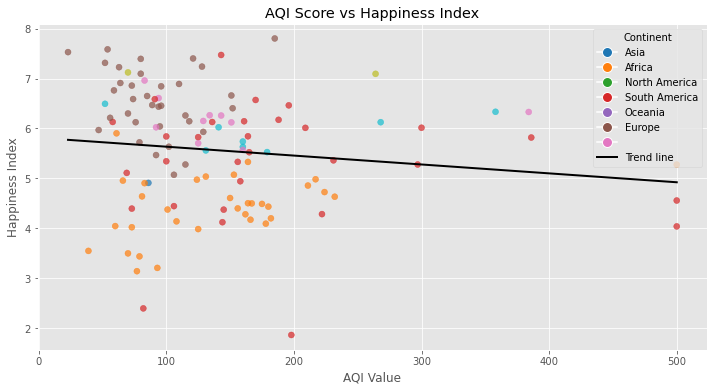

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pycountry_convert import country_name_to_country_alpha2, country_alpha2_to_continent_code, convert_continent_code_to_continent_name

# Read pollution dataset
df_pollution = pd.read_csv('data/pollution/pollution_dataset.csv')
df_pollution = df_pollution[['Country', 'AQI Value']]
df_pollution = df_pollution.sort_values(by='AQI Value', ascending=False)
df_pollution = df_pollution.drop_duplicates(subset=['Country'], keep='first')

# Read happiness index dataset
df_happiness = pd.read_csv('data/WHR/WHR2023.csv')
df_happiness = df_happiness[['Country name', 'Ladder score']]

# Merge datasets
merged_df = pd.merge(df_pollution, df_happiness, left_on='Country', right_on='Country name', how='inner')

# Function to get continent for a country
def get_continent_for_country(row):
    try:
        country_alpha2 = country_name_to_country_alpha2(row['Country'])
        country_continent_code = country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except (ValueError, KeyError) as e:
        print(f"Error getting continent for {row['Country']}: {e}")
        return None

# Add continent column
merged_df['Continent'] = merged_df.apply(get_continent_for_country, axis=1)

# Scatter plot with color coordination based on continent
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the width by changing the first value in figsize

# Scatter plot with color coordination based on continent
scatter = ax.scatter(merged_df['AQI Value'], merged_df['Ladder score'], c=merged_df['Continent'].astype('category').cat.codes, cmap='tab10', alpha=0.7)

# Calculate the trend line
x = merged_df['AQI Value']
y = merged_df['Ladder score']
m, b = np.polyfit(x, y, 1)

# Plot the trend line as solid
sorted_indices = np.argsort(x)
ax.plot(x.iloc[sorted_indices].values, (m*x.iloc[sorted_indices].values + b), color='black', linestyle='-', linewidth=2)

# Create legend
legend_labels = merged_df['Continent'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.tab10(i), markersize=10) for i in range(len(legend_labels))]
legend_labels = np.append(legend_labels, 'Trend line')
legend_handles.append(plt.Line2D([0], [0], color='black', linestyle='-', linewidth=2))
ax.legend(legend_handles, legend_labels, title='Continent', loc='best')

# Set labels and title
ax.set_xlabel('AQI Value')
ax.set_ylabel('Happiness Index')
ax.set_title('AQI Score vs Happiness Index')

# Show the plot
plt.show()

In [14]:
import pandas as pd 
import plotly.express as px #for making plots
import country_converter as coco #for country codes

cc = coco.CountryConverter()

#reads in happiness report, pollution, and healthcare access datasets
happiness = pd.read_csv('data/WHR/cleanData/clean2023HappinessData.csv')
pollution = pd.read_csv('data/pollution/pollution_dataset.csv')
healthcare = pd.read_csv('data/healthcare/_hap.csv')

healthcare = healthcare.rename(columns={'Year': 'year'}) # renames year column to match year column in happiness df
happiness.dropna(inplace=True) # drops any NaN values



# only saves country name and pollution value
pollution = pollution[['Country', 'AQI Value']]
# only saves country name, year and healthcare value
healthcare = healthcare[['Country name', 'year', 'Healthcare Access']]

pollution = pollution.groupby('Country')['AQI Value'].mean().reset_index() #averages out aqi value for all entries with same country

# adds country codes to pollution and healthcare as another column using country converter
pollution['Country Code'] = pollution['Country'].apply(lambda x: cc.convert(x, to='ISO3', not_found=None))
healthcare['Country Code'] = healthcare['Country name'].apply(lambda x: cc.convert(x, to='ISO3', not_found=None))


merged = pd.merge(happiness, pollution, on='Country Code', how='left') # merges happiness dataframe with pollution dataframe on country codes
merged = pd.merge(merged, healthcare, on=['Country Code', 'year'], how='left') # merges healthcare access df to all categories df on country codes
# merged = merged.dropna(subset=['AQI Value']) # drops any NaN values

# only takes values of all categories that we want to see correlation of
correlation = merged[['Life Ladder', 'Log GDP per capita', 'Healthy life expectancy at birth', 'Social support', 'Freedom to make life choices',
                       'Perceptions of corruption', 'AQI Value', 'Healthcare Access']]

# calculates correlation between each category and squares it
corr_matrix = round(correlation.corr()**2, 4)

print(corr_matrix) # prints correlation matrix

# creates 2d squared correlation heatmap
fig = px.imshow(corr_matrix,
                labels=dict(x='Categories', y='Categories', color='Squared Correlation Coefficient'),
                x=corr_matrix.columns,
                y=corr_matrix.index,
                title='Squared Correlation Coefficients of Happiness Report Categories(2005-2022)')

# Show the plot
fig.show()

Congo  not found in regex
Congo  not found in regex
Congo  not found in regex
Congo  not found in regex
Congo  not found in regex


                                  Life Ladder  Log GDP per capita  \
Life Ladder                            1.0000              0.6210   
Log GDP per capita                     0.6210              1.0000   
Healthy life expectancy at birth       0.5251              0.6909   
Social support                         0.5236              0.4851   
Freedom to make life choices           0.2821              0.1263   
Perceptions of corruption              0.2032              0.1223   
AQI Value                              0.0287              0.0184   
Healthcare Access                      0.0187              0.0239   

                                  Healthy life expectancy at birth  \
Life Ladder                                                 0.5251   
Log GDP per capita                                          0.6909   
Healthy life expectancy at birth                            1.0000   
Social support                                              0.3622   
Freedom to make life choices

In [15]:
import pandas as pd
import plotly.express as px


happiness = pd.read_csv('data/WHR/cleanData/clean2023HappinessData.csv')

# keeps values relevant to Freedom and Life Ladder as well as location
freedom = happiness[['Country name', 'year', 'Life Ladder', 'Freedom to make life choices', 'Country Code', 'Continent', 'Region']]

freedom = freedom.dropna(subset=['Freedom to make life choices']) # drops any NaN values 

# creates histogram plot of averaged freedom values by country
fig = px.histogram(freedom, x='Country name', y='Freedom to make life choices', color='Continent', histfunc='avg', template="plotly_white",
             title='Average Freedom to make life choices by Country(2005-2022)').update_xaxes(categoryorder="total ascending")
fig.show() # displays figure

# Finds correlation between Freedom and Life Ladder
corr = round(freedom['Freedom to make life choices'].corr(freedom['Life Ladder']), 3)



# Creates a scatter plot of Freedom vs Life Ladder with a trendline
fig = px.scatter(freedom, x='Freedom to make life choices', y='Life Ladder', color='Continent', trendline='ols', trendline_scope="overall", trendline_color_override="black",
                 title='Freedom to make life choices vs Life Ladder(2005-2022)<br>' + 'Correlation: ' + str(corr), template="plotly_white")
fig.show() # displays figure

# groups countries and finds their average freedom and life ladder throughout the years
average_freedom_by_country = freedom.groupby('Country name').agg({
    'Freedom to make life choices': 'mean',
    'Life Ladder': 'mean',
    'Continent': 'first',
    'Region': 'first'
    }).reset_index()

# sorts average values by continent
average_freedom_by_country = average_freedom_by_country.sort_values('Continent')
# sorts Freedom values
average_freedom_by_country = average_freedom_by_country.sort_values('Freedom to make life choices').reset_index(drop=True)


# creates bar graph of Freedom for every country with colorbar from red to green of least to greatest
fig3 = px.bar(average_freedom_by_country, x='Country name', y='Freedom to make life choices', color='Freedom to make life choices', color_continuous_scale='RdYlGn',
             title='Average Freedom to make life choices by Country(2005-2022)', template="plotly_white")
fig3.show() # displays plot

bottomTen = average_freedom_by_country[:10] # bottom ten freedom values
topTen = average_freedom_by_country[-10:].sort_values('Freedom to make life choices', ascending=False) # top ten freedom values
# print(bottomTen.head(10))
# print(topTen.head(10))

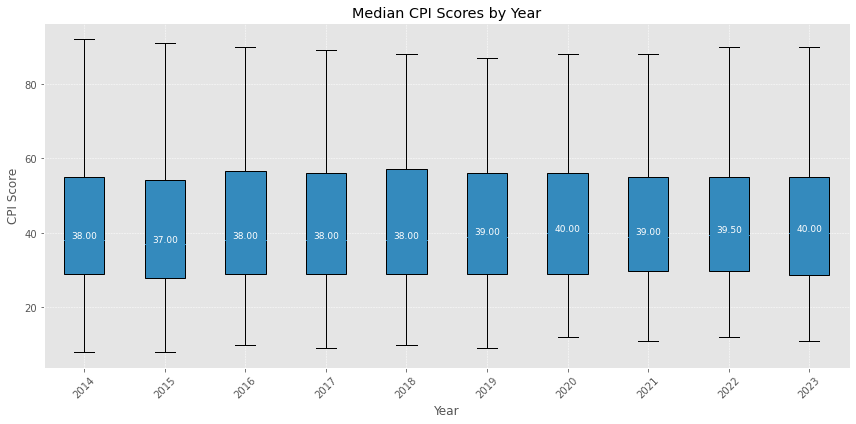

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a pandas DataFrame
file_path = 'data/corruption/CPI2021GlobalResults.csv'

cpi_data = pd.read_csv(file_path, skiprows=2)

# Extract the columns that contain the yearly CPI scores
cpi_score_columns = sorted([col for col in cpi_data.columns if 'CPI score' in col], key=lambda x: int(x.split()[-1]))

# Calculate the median CPI score for each year
median_cpi_scores = cpi_data[cpi_score_columns].median()


boxplot_data = [cpi_data[col].dropna() for col in cpi_score_columns]

# Create a box plot for the yearly CPI scores
plt.figure(figsize=(12, 6))
boxplot_dict = plt.boxplot(boxplot_data, patch_artist=True, labels=[col.split()[-1] for col in cpi_score_columns])

# Set the labels and title
plt.title('Median CPI Scores by Year')
plt.xlabel('Year')
plt.ylabel('CPI Score')
plt.xticks(rotation=45)

# Annotate each box with the median score
for line, col in zip(boxplot_dict['medians'], cpi_score_columns):
    # Get the median value
    median = line.get_ydata()[0]
    x_position = line.get_xdata()[0] + (line.get_xdata()[1] - line.get_xdata()[0]) / 2
    plt.text(x_position, median, f'{median:.2f}', ha='center', va='bottom', fontsize=9, color='white')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()


No handles with labels found to put in legend.


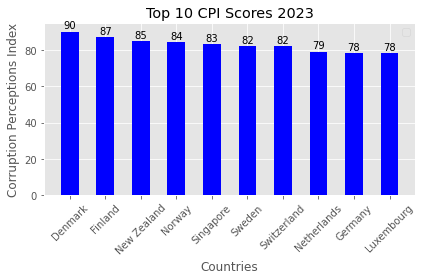

In [17]:
import matplotlib.pyplot as plt 
import csv 

x = [] 
y = []
data = []

  
with open('data/corruption/cpidata2023.csv','r') as csvfile: 
    plots = csv.reader(csvfile, delimiter = ',')
    next(plots, None) 
      
    for row in plots:
        country_name = row[0] 
        cpi_score = int(row[3])
        data.append((country_name, cpi_score))
  
top_10_countries = sorted(data, key=lambda x: x[1], reverse=True)[:10]

# Unpack the top 10 countries into two lists for plotting
x, y = zip(*top_10_countries)

plt.bar(x, y, color='b', width=0.5)
for i in range(len(x)):
    plt.text(i, y[i] + 0.5, str(y[i]), ha='center', va='bottom')

plt.xlabel('Countries')
plt.ylabel('Corruption Perceptions Index')
plt.title('Top 10 CPI Scores 2023')
plt.xticks(rotation=45) 
plt.legend()
plt.tight_layout()
plt.show()

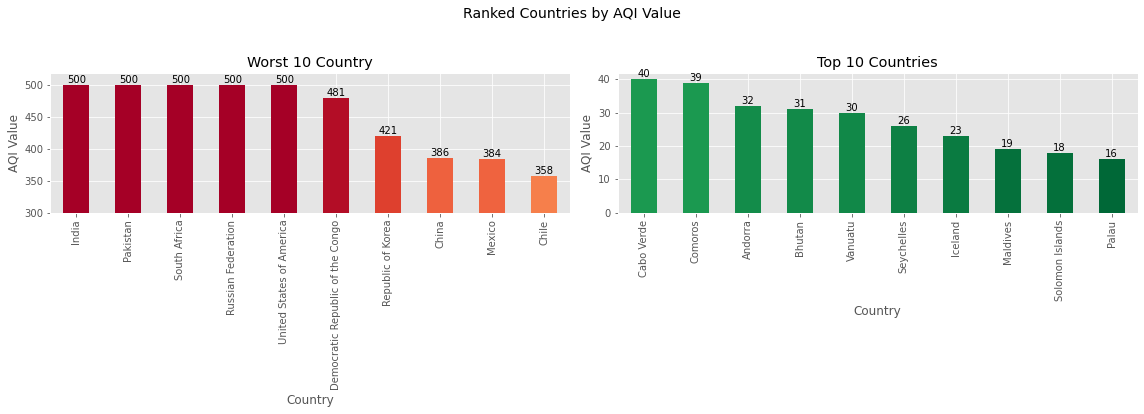

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize

df = pd.read_csv('data/pollution/pollution_dataset.csv')
columns_to_keep = ['Country', 'AQI Value']
df = df[columns_to_keep]
df = df.sort_values(by='AQI Value', ascending=False)
df = df.drop_duplicates(subset=['Country'], keep='first')
df1 = df.head(10)
df2 = df.tail(10)

# Set up subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Use 'RdYlGn_r' colormap for the bar graphs (reverse the color mapping)
cmap = cm.get_cmap('RdYlGn_r')

# Create a custom normalization function to make the lowest values change faster
min_value = df['AQI Value'].min()
max_value = df['AQI Value'].max()

def custom_normalize(value):
    normalized_value = (value - min_value) / (max_value - min_value)
    return normalized_value**0.75  # Adjust the exponent to control how quickly the colors change

# Normalize AQI values using the custom normalization function
norm1 = Normalize(vmin=min_value, vmax=max_value)
norm1_custom = custom_normalize(df1['AQI Value'])
colors1 = cmap(norm1_custom)

# Plotting the first DataFrame (worst AQI values) with the reversed 'RdYlGn' colormap
df1.plot(x='Country', y='AQI Value', kind='bar', ax=ax1, color=colors1, legend=False)
ax1.set_ylim([300, 520])
ax1.set_title('Worst 10 Country')

# Annotate each bar with its value
for index, value in enumerate(df1['AQI Value']):
    ax1.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='black')

# Normalize AQI values using the custom normalization function for the second DataFrame
norm2_custom = custom_normalize(df2['AQI Value'])
colors2 = cmap(norm2_custom)

# Plotting the second DataFrame (best AQI values) with the reversed 'RdYlGn' colormap
df2.plot(x='Country', y='AQI Value', kind='bar', ax=ax2, color=colors2, legend=False)
ax2.set_title('Top 10 Countries')

# Annotate each bar with its value
for index, value in enumerate(df2['AQI Value']):
    ax2.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='black')

# Adding labels and title
fig.suptitle('Ranked Countries by AQI Value', fontsize=14)
ax1.set_xlabel('Country', fontsize=12)
ax1.set_ylabel('AQI Value', fontsize=12)
ax2.set_xlabel('Country', fontsize=12)
ax2.set_ylabel('AQI Value', fontsize=12)

# Change font for all text in the bar graph
font_properties = {'family': 'serif', 'color':  'darkred', 'weight': 'normal', 'size': 10}
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams.update({'text.color': 'darkred'})
plt.rcParams.update({'axes.labelcolor': 'darkred'})
plt.rcParams.update({'xtick.color': 'darkred'})
plt.rcParams.update({'ytick.color': 'darkred'})
plt.rcParams.update({'axes.labelsize': 10})

# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for title
plt.show()

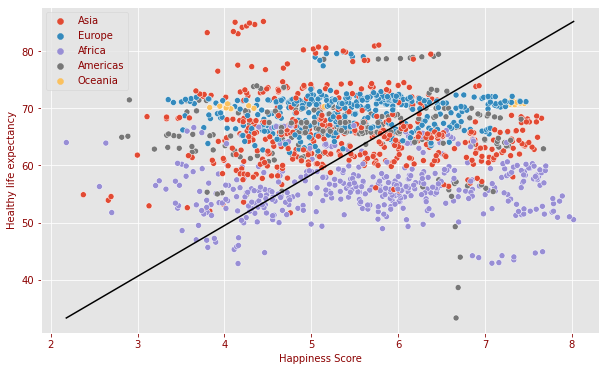

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("data/lifeExpectancy/_life.csv")

# Calculate mean happiness score
mean_happiness_score = df['Happiness score'].mean()

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Happiness score', y='Healthy life expectancy', hue='continents')
correlation_score = (df['Healthy life expectancy']).corr(df['Happiness score'])
#print(correlation_score)

# Plot diagonal mean line
plt.plot([df['Happiness score'].min(), df['Happiness score'].max()],
         [df['Healthy life expectancy'].min(), df['Healthy life expectancy'].max()],
         color='black')

#plt.legend()
plt.legend(loc='upper left')
plt.xlabel('Happiness Score')
plt.ylabel('Healthy life expectancy')

plt.show()

In [20]:
import pandas as pd
import plotly.express as px

# reads happiness report csv
happiness = pd.read_csv('data/WHR/cleanData/clean2023HappinessData.csv')

# saves only needed columns for social support
social = happiness[['Country name', 'year','Life Ladder', 'Social support', 'Country Code', 'Continent', 'Region']]
social = social.dropna(subset=['Social support']).reset_index(drop=True) # drops any NaN values

# Creates a hsitogram of average Social Support Scores by country over the years
fig = px.histogram(social, x='Country name', y='Social support', color='Continent', histfunc='avg', template="plotly_white",
             title='Average Social Support by Country(2005-2022)').update_xaxes(categoryorder="total ascending")
fig.show() # displays figure

# Calculates correlation between social support and life ladder
corr = round(social['Social support'].corr(social['Life Ladder']), 3)

# Creates scatter plot of social support vs life ladder with trendline
fig = px.scatter(social, x='Social support', y='Life Ladder', color='Continent', trendline='ols', trendline_scope="overall", trendline_color_override="black",
                 title='Social Support vs Life Ladder(2005-2022)<br>' + 'Correlation: ' + str(corr), template="plotly_white")
fig.show() # displays figure

# finds average life ladder and social support for every country
avg_social_by_country = social.groupby('Country name').agg({
    'Social support': 'mean',
    'Life Ladder': 'mean',
    'Continent': 'first',
    'Region': 'first'
    }).reset_index()


# sorts by social support
avg_social_by_country = avg_social_by_country.sort_values('Social support').reset_index(drop=True)

# Creates a bar plot of average social support colored from red to green by least to greatest
fig = px.bar(avg_social_by_country, x='Country name', y='Social support', color='Social support', color_continuous_scale='RdYlGn',
             title='Average Social Support by Country(2005-2022)', template="plotly_white")
fig.show() # displays figure

bottomTen = avg_social_by_country[:10] # bottom 10 social support scores
topTen = avg_social_by_country[-10:].sort_values('Social support', ascending=False) # top 10 social support scores



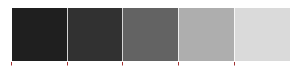

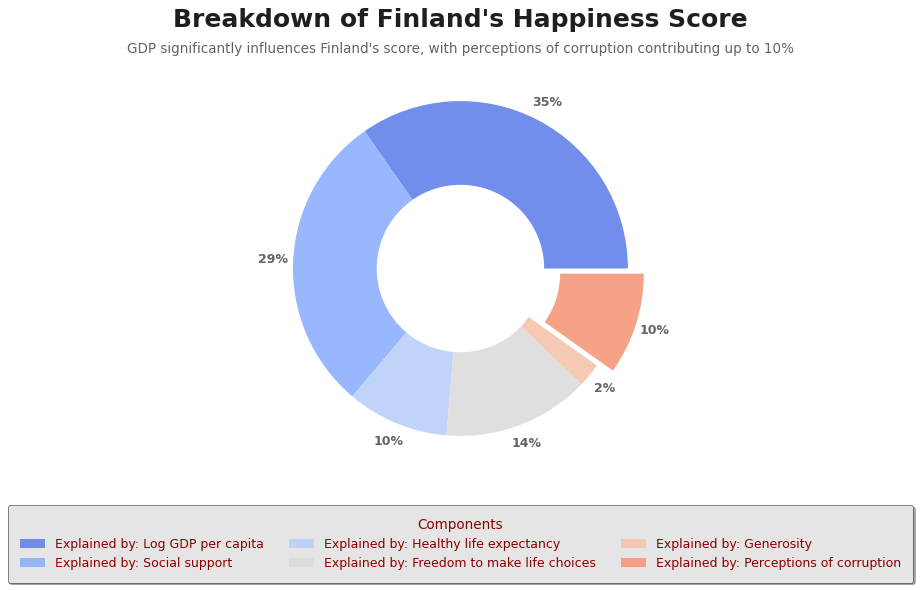

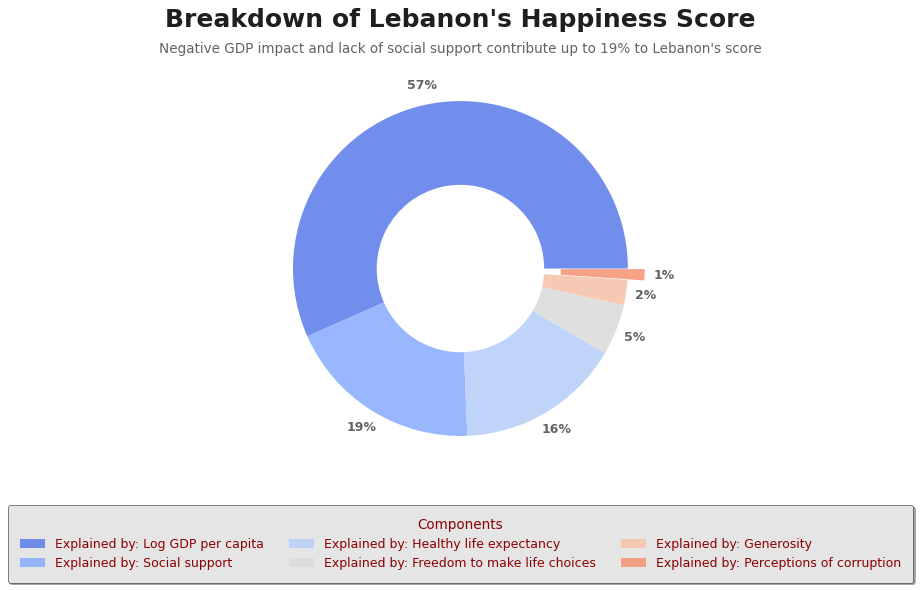

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

# Define custom color palettes for visualization
dark_theme_colors = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
# Display the custom color palettes
sns.palplot(dark_theme_colors)

# Function to create a non-linear color dictionary for custom colormaps
def create_color_dictionary(step_values, color_hex_values):
    color_dictionary = {'red': (), 'green': (), 'blue': ()}
    for step, color_hex in zip(step_values, color_hex_values):
        rgb_color = mpl.colors.hex2color(color_hex)
        for color in ('red', 'green', 'blue'):
            color_dictionary[color] += ((step, rgb_color[color == 'red'], rgb_color[color == 'green'], rgb_color[color == 'blue']),)
    return color_dictionary

thresholds = [0, 0.2, 0.5, 0.8, 1]
color_dict_example = create_color_dictionary(thresholds, dark_theme_colors)

# Create custom colormaps
custom_colormap = LinearSegmentedColormap('ExampleColormap', color_dict_example)

# Setting up Matplotlib parameters for aesthetics
mpl.rcParams.update({
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.left': False,
    'axes.titlecolor': dark_theme_colors[0],
    'axes.labelcolor': dark_theme_colors[0],
    'xtick.color': dark_theme_colors[0],
    'ytick.color': dark_theme_colors[0],
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.edgecolor': dark_theme_colors[0],
})

# Load datasets
data_current_year = pd.read_csv("data/WHR/WHR2023.csv")
data_historical = pd.read_csv("data/WHR/world-happiness-report.csv")

# Extract components of happiness from the dataset
happiness_components = list(data_current_year.columns[-7:-1])

# Prepare dataframes for visualization
dataframe = data_current_year[["Country name"] + happiness_components].set_index("Country name")
dataframe.rename(columns={'Generosity': 'Air Quality'}, inplace=True)

# Visualizing data for Finland
data_finland = dataframe.loc['Finland']
figure, axis = plt.subplots(figsize=(14, 8), dpi=75)
explode_tuple = (0, 0, 0, 0, 0, 0.1)
axis.pie(
    data_finland, 
    colors=sns.color_palette("coolwarm", 7),
    explode=explode_tuple,
    wedgeprops=dict(width=0.5, alpha=0.9),
    autopct='%1.0f%%',
    pctdistance=1.12,
    textprops={
        'fontsize': 12, 
        'color': dark_theme_colors[2],
        'fontweight': 'bold'
    }
)

# Adjusting legend and title
axis.legend(data_finland.index, title="Components", loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, borderpad=1, frameon=True, fontsize=12, title_fontsize='13', shadow=True)
plt.suptitle(t="Breakdown of Finland's Happiness Score", fontsize=24, fontweight='bold', color=dark_theme_colors[0])
plt.title("GDP significantly influences Finland's score, with perceptions of corruption contributing up to 10%", fontsize=13, color=dark_theme_colors[2])
plt.tight_layout()
plt.savefig('images/general/Visual_Finland.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualizing data for Lebanon
data_lebanon = dataframe.loc['Lebanon']
figure, axis = plt.subplots(figsize=(14, 8), dpi=75)
axis.pie(
    data_lebanon, 
    colors=sns.color_palette("coolwarm", 7),
    explode=explode_tuple,
    wedgeprops=dict(width=0.5, alpha=0.9),
    autopct='%1.0f%%',
    pctdistance=1.12,
    textprops={
        'fontsize': 12, 
        'color': dark_theme_colors[2],
        'fontweight': 'bold'
    }
)

# Adjusting legend and title for Lebanon
axis.legend(data_lebanon.index, title="Components", loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, borderpad=1, frameon=True, fontsize=12, title_fontsize='13', shadow=True)
plt.suptitle(t="Breakdown of Lebanon's Happiness Score", fontsize=24, fontweight='bold', color=dark_theme_colors[0])
plt.title("Negative GDP impact and lack of social support contribute up to 19% to Lebanon's score", fontsize=13, color=dark_theme_colors[2])
plt.tight_layout()
plt.show()

findfont: Font family ['Serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Font family ['Serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman


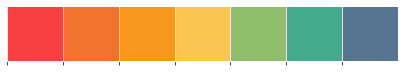

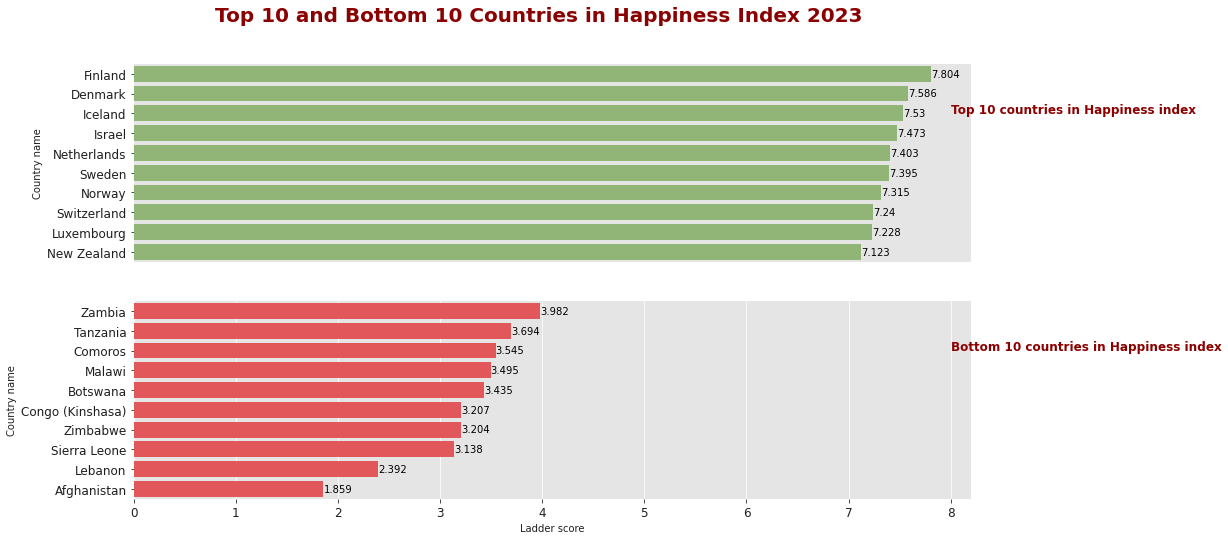

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import plotly.graph_objects as go


df = pd.read_csv('data/WHR/WHR2023.csv')
df1=pd.read_csv('data/WHR/world-happiness-report.csv')
import warnings
warnings.filterwarnings("ignore")

df.head()
df1.head()
color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]
sns.palplot(color)
fig = plt.figure(figsize=(15, 8))
g = gs.GridSpec(ncols=1, nrows=2, figure=fig)
plt.suptitle("Top 10 and Bottom 10 Countries in Happiness Index 2023", family='Serif', weight='bold', size=20)

# Plot for Top 10 Countries
ax1 = plt.subplot(g[0, 0])
top_10 = df.head(10)
sns.barplot(data=top_10, x='Ladder score', y='Country name', color=color[4], ax=ax1)
ax1.xaxis.set_visible(False)
ax1.annotate("Top 10 countries in Happiness index", xy=(8, 2), family='Serif', weight='bold', size=12)
for index, value in enumerate(top_10['Ladder score']):
    ax1.text(value, index, str(value), color='black', ha="left", va="center")

# Plot for Bottom 10 Countries
ax2 = plt.subplot(g[1, 0], sharex=ax1)
bot_10 = df.tail(10)
sns.barplot(data=bot_10, x='Ladder score', y='Country name', color=color[0], ax=ax2)
ax2.annotate("Bottom 10 countries in Happiness index", xy=(8, 2), family='Serif', weight='bold', size=12)
for index, value in enumerate(bot_10['Ladder score']):
    ax2.text(value, index, str(value), color='black', ha="left", va="center")

for s in ['left', 'right', 'top', 'bottom']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

# Save the figure
plt.savefig("images/general/top_and_bottom_countries_happiness_2023.png", dpi=300, bbox_inches='tight')

plt.show()

df.rename(columns={'Generosity': 'Air Quality Index'}, inplace=True)
df1.rename(columns={'Generosity': 'Air Quality Index'}, inplace=True)



categories = ['Ladder score','Logged GDP per capita','Social support','Healthy life expectancy', 'Freedom to make life choices', 'Air Quality Index', 'Perceptions of corruption']

r1=[df[each][df["Country name"]=="Afghanistan"].mean()/df[each].max()  for each in categories]
r2=[df[each][df["Country name"]=="Finland"].mean()/df[each].max()  for each in categories]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=r1,
      theta=categories,
      fill='toself',
      name='Afghanistan'
))
fig.add_trace(go.Scatterpolar(
      r=r2,
      theta=categories,
      fill='toself',
      name='Finland'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.write_image("images/general/radar_comparison_plot.png")
fig.show()




